# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [7]:
url = "https://books.toscrape.com/"

In [9]:
response = requests.get(url)

In [10]:
response

<Response [200]>

In [13]:
page_element = BeautifulSoup(response.text, "html.parser")

In [15]:
product_elements = page_element.select("article.product_pod")

In [17]:
product_elements

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [20]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."
    img = product_element.select_one(".image_container")
    img_url = img.select_one("img").get("src")
    return img_url

    # YOUR CODE HERE
    raise NotImplementedError()

In [22]:
get_image_url(product_elements[0])

'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

Test your implementation by running the following cell.

In [25]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

In [27]:
product_elements

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

In [29]:
# rating = product_elements[0].select_one("p.star-rating")
# rating
rating_class = product_elements[0].select_one("p")["class"]
result = None
if(rating_class[1] == 'One'):
    result = 1
elif(rating_class[1] == 'Two'):
    result = 2
elif(rating_class[1] == 'Three'):
    result = 3
elif(rating_class[1] == 'Four'):
    result = 4
elif(rating_class[1] == 'Five'):
    result = 5

result

3

In [31]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."
    rating_class = product_element.select_one("p")["class"]
    rating_map = {'One': 1, 'Two': 2, 'Three' : 3, 'Four': 4, 'Five': 5}
    return rating_map.get(rating_class[1])
    
    # YOUR CODE HERE
    raise NotImplementedError()


Test your implementation by running the following cell.

In [34]:
### TEST
assert get_rating(product_elements[0]) == 3

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [37]:
product_elements

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

In [39]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."
    title = product_element.select_one("h3 a").get("title")
    return title

    # YOUR CODE HERE
    raise NotImplementedError()

Test your implementation by running the following cell.

In [42]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [45]:
product_elements

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

In [47]:
full_price = product_elements[0].select_one(".price_color")
price = full_price.text.split("£")
price[1]

'51.77'

In [49]:
def get_price(product_element):
    "Get the price of the given product element."
    full_price = product_element.select_one(".price_color")
    price = full_price.text.split("£")
    return float(price[1])

    # YOUR CODE HERE
    raise NotImplementedError()

Test your implementation by running the following cell.

In [52]:
### TEST
assert get_price(product_elements[0]) == 51.77

In [54]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [56]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [58]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [60]:
df = pd.DataFrame(product_data)

In [62]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [ ]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [147]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""
    df["rating"].value_counts().sort_index().plot.bar(rot=0, edgecolor='black')
    return
    # YOUR CODE HERE
    raise NotImplementedError()

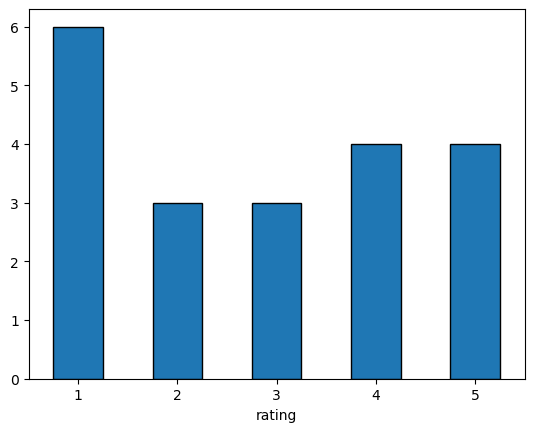

In [149]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [86]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""
    bins = [10, 20, 30, 40, 50]
    plt.hist(df["price"], bins=bins, edgecolor='black')
    plt.xticks(bins)
    plt.show()
    return

    # YOUR CODE HERE
    raise NotImplementedError()

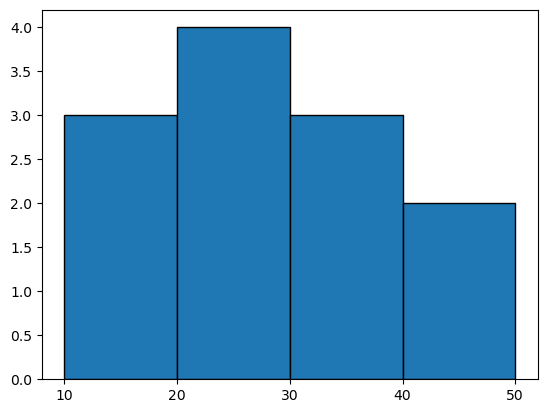

In [88]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [125]:
df['title'].str.len().count()

20

In [143]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    title_lengths = df['title'].str.len()
    plt.hist(title_lengths, bins=bins, edgecolor='black')
    plt.title('Distribution of Product Title Lengths')
    plt.xticks(bins)
    plt.show()
    return
    # YOUR CODE HERE
    raise NotImplementedError()

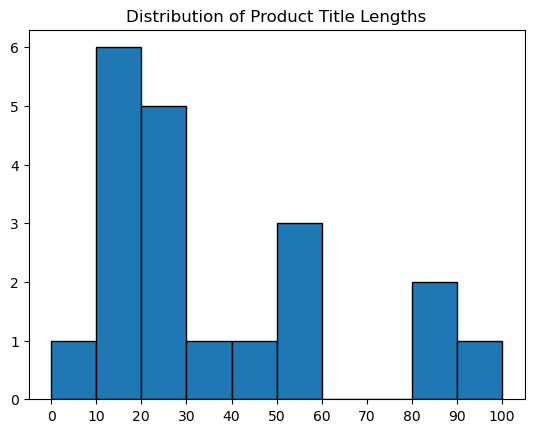

In [145]:
plot_title_length_distribution(df)

**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [106]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""
    sns.boxplot(df, x="rating", y="price")
    return

    # YOUR CODE HERE
    raise NotImplementedError()

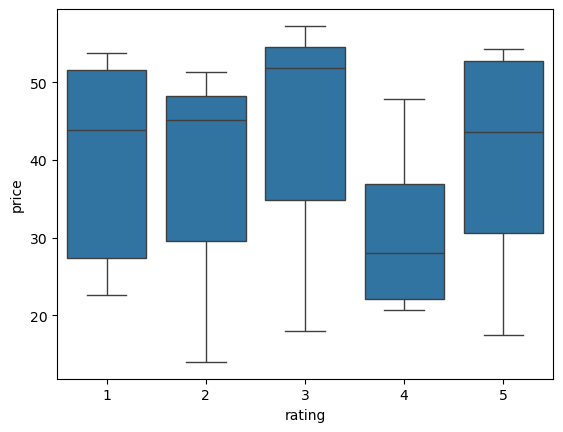

In [108]:
plot_price_distribution_per_rating(df)

**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [102]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""
    sns.heatmap(df.corr(numeric_only=True), annot=True)
    return

    # YOUR CODE HERE
    raise NotImplementedError()

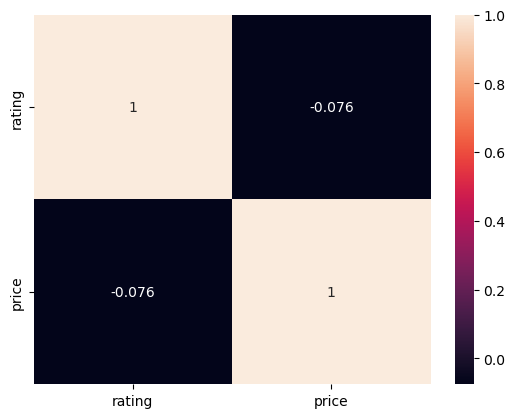

In [104]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [94]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """
    stats = df.groupby('rating')['price'].describe()
    return stats
    

    # YOUR CODE HERE
    raise NotImplementedError()

In [96]:
compute_descriptive_stats_for_price_per_rating(df)

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,6.0,40.018333,14.178174,22.65,27.3075,43.845,51.6375,53.74
2,3.0,36.830000,20.018382,13.99,29.5800,45.170,48.2500,51.33
3,3.0,42.316667,21.296472,17.93,34.8500,51.770,54.5100,57.25
4,4.0,31.105000,12.460865,20.66,22.1150,27.970,36.9600,47.82
5,4.0,39.750000,17.186613,17.46,30.6300,43.655,52.7750,54.23
